#**Introduction**
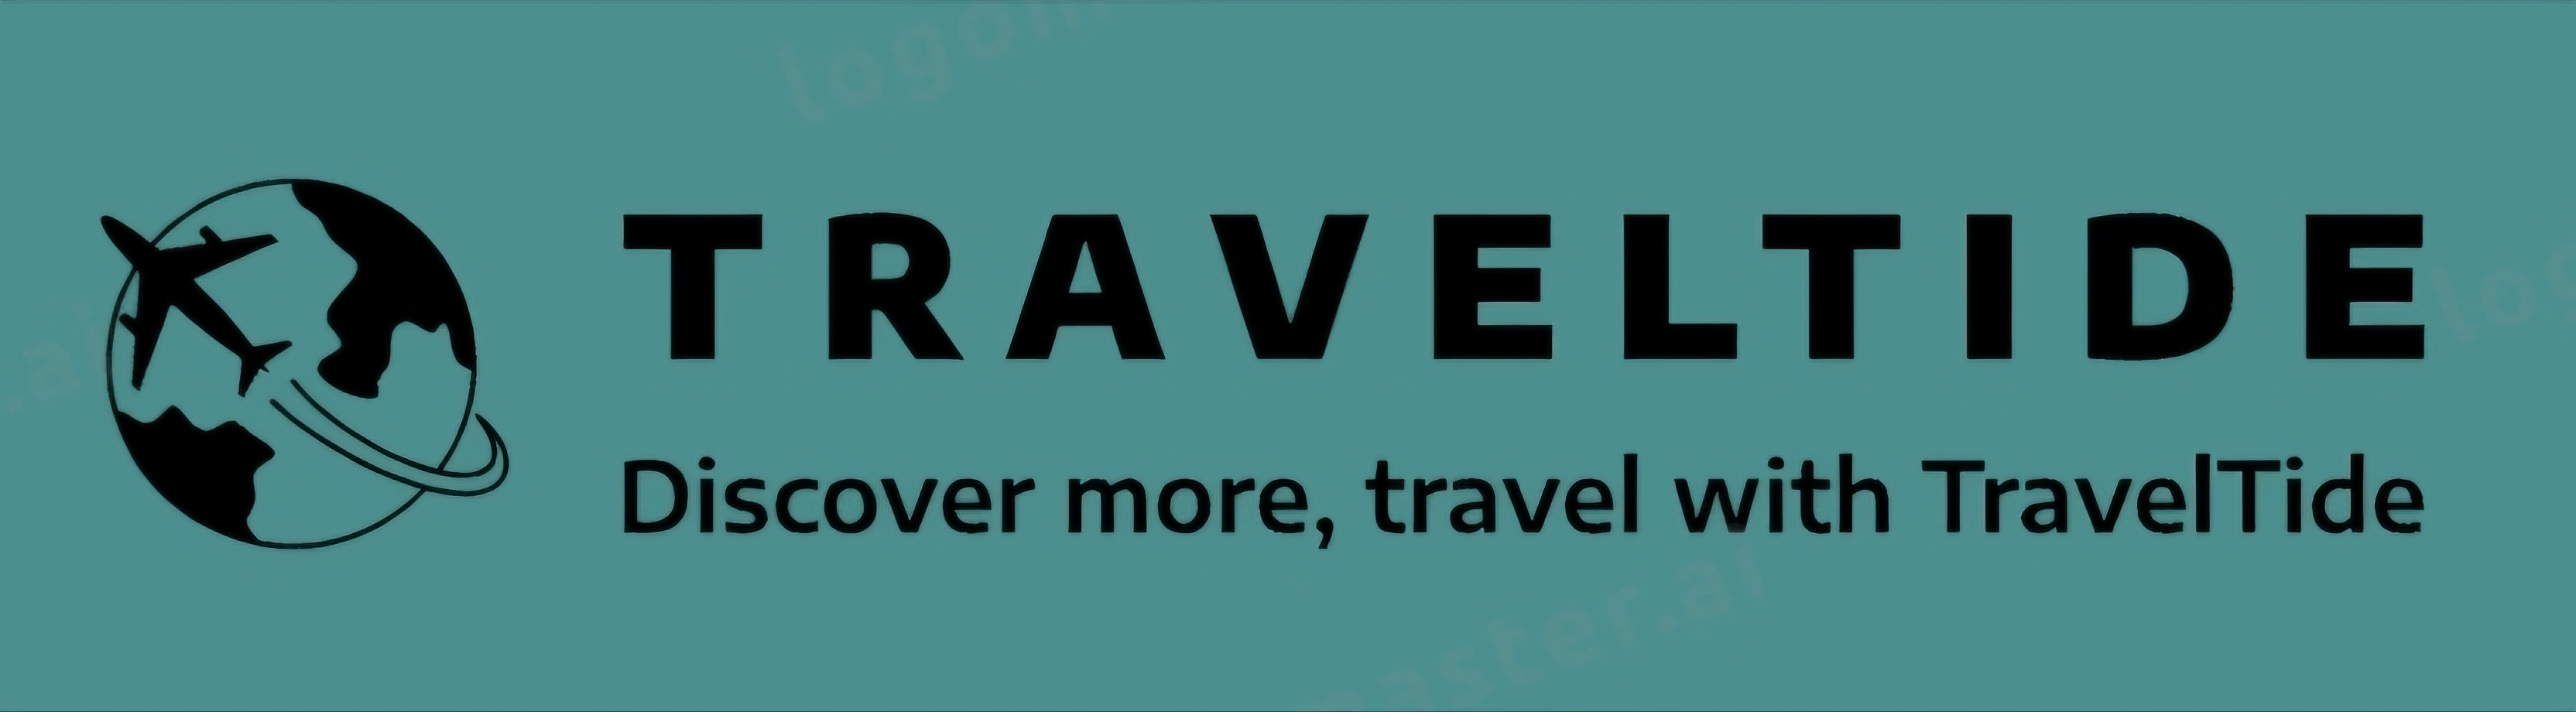

Virtual Booking Platform TravelTide is a rising star in the online travel industry. Since its inception in April 2021, just as the COVID-19 pandemic was waning, the company has seen consistent growth driven by its state-of-the-art data collection and search capabilities. TravelTide offers its customers access to the most extensive booking catalog in the e-booking sector.  CEO Kevin Talanick is focused on strengthening customer loyalty and retention. by crafting a marketing strategy deeply informed by customer behavior insights. Our **OBJECTIVE**: Segment customers based on their behavior and develop a personalized rewards program that ensures they continue to choose TravelTide for their travel needs.

#**Data Preparation**#

###Import Libraries###

In [20]:
import pandas as pd
import sqlalchemy as sa

###Connect to SQL Database###

In [21]:
travel_tide_url = 

###Extract tables from Database###

In [22]:
engine = sa.create_engine(travel_tide_url)
connection = engine.connect().execution_options(isolation_level="AUTOCOMMIT")

#**Initial Data Exploration**#

1. Query the users table to get a breakdown of users by gender, marital status, and whether they have children.
> Most TravelTide clients are single and have no children. Most likely they are focused on career, seld-development and travel. This segment often prefers spontaneous decisions and can devote more time and money to personal hobbies, travel and new experiences. They are less constrained by family responsibilities, which allows them to manage their time and budget more freely.


In [23]:
query = """
SELECT
    CASE
      WHEN gender = 'F' THEN 'Female'
      WHEN gender = 'M' THEN 'Male'
    ELSE 'Other'
    END AS gender,
    CASE
      WHEN married = true THEN 'Married'
      ELSE 'Single'
    END AS marital_status,
    CASE
      WHEN has_children = true THEN 'Has Children'
      ELSE 'No Children'
    END AS parenting_status,
    CASE
      WHEN has_children = true THEN 'Has Children'
      ELSE 'No Children'
    END AS parenting_status,
    COUNT(user_id) AS number_of_users,
    ROUND((COUNT(user_id) * 100.0 / SUM(COUNT(user_id)) OVER ()),2) AS percentage_of_users
FROM
    users
GROUP BY
    gender, married, has_children
ORDER BY
    number_of_users DESC;
"""

display(pd.read_sql(sa.text(query),connection))

,gender,marital_status,parenting_status,parenting_status,number_of_users,percentage_of_users
0,Male,Single,No Children,No Children,257074,25.18
1,Female,Single,No Children,No Children,200053,19.60
2,Male,Married,No Children,No Children,127701,12.51
3,Female,Married,No Children,No Children,110504,10.82
4,Male,Single,Has Children,Has Children,91457,8.96
5,Male,Married,Has Children,Has Children,82754,8.11
6,Female,Married,Has Children,Has Children,72169,7.07
7,Female,Single,Has Children,Has Children,70928,6.95
8,Other,Single,No Children,No Children,4938,0.48
9,Other,Single,Has Children,Has Children,1659,0.16


 2. What is the distribution of the user's birth year?

> TravelTide's customer base spans a wide age range, with customers ranging from young travelers born in 2006 to older customers born in 1931. Such a broad demographic requires flexibility in service offerings to meet the needs of different ages. Younger customers are likely to be looking for budget and active travel options, while older customers may value comfort, safety and convenience.

In [24]:
query = """
SELECT
    EXTRACT(YEAR FROM birthdate) AS birthdate_year,
    COUNT (*) AS user_count
FROM
    users
GROUP BY
    birthdate_year
ORDER BY
    user_count;
"""

display(pd.read_sql(sa.text(query),connection))

,birthdate_year,user_count
0,1931.0,1
1,1932.0,5
2,1933.0,8
3,1934.0,24
4,1935.0,33
...,...,...
71,1985.0,30914
72,1982.0,31135
73,1983.0,31179
74,1984.0,31641



Do you spot any irregularity there?

> There is a large gap between users by year of birth. A person's current age can vary depending on their date of birth, which leads to differences in the results of the two queries

What is special about birth year 2006?

> The most users - 43360

How would you calculate the age based on birth date?

In [25]:
query = """
SELECT
    EXTRACT(YEAR FROM AGE(CURRENT_DATE, birthdate)) AS age,
    COUNT (*)
FROM
    users
GROUP BY
    age
ORDER BY
    age DESC;
"""

display(pd.read_sql(sa.text(query),connection))

,age,count
0,93.0,1
1,92.0,1
2,91.0,10
3,90.0,17
4,89.0,37
...,...,...
72,21.0,10183
73,20.0,8824
74,19.0,7875
75,18.0,31829


3. You may define “customer age” as a period in months since the user signed up to the platform. What is the average “customer age” of TravelTide user?

> If majority of customers do not stay longer than 4-5 months, this may be a signal that TravelTide needs to improve its loyalty programs or service quality to extend their life cycle



In [26]:
query = """
SELECT
AVG(EXTRACT(MONTH FROM AGE(CURRENT_DATE, sign_up_date))) AS average_customer_age_in_months
FROM users;
"""

display(pd.read_sql(sa.text(query),connection))

,average_customer_age_in_months
0,4.914673


4.  What are the 10 most popular hotels?

*   Include the information about the average duration of stay and average price before the discount.
*   Do the same for most expensive hotels (top 10), hotels with the longest stays and etc.

In [27]:
# TOP 10 the most popular hotels of Nights Stayed
query = """
WITH nights_correction AS(
  SELECT hotel_name,
    CASE WHEN nights <= 0 THEN 1 ELSE nights
      END AS nights
  FROM
      hotels)
  SELECT hotel_name,
      SUM(nights) AS total_nights
  FROM nights_correction
  GROUP BY
      hotel_name
  ORDER BY
      total_nights DESC
LIMIT 10;
"""

display(pd.read_sql(sa.text(query),connection))

,hotel_name,total_nights
0,Radisson - new york,59767
1,Rosewood - new york,59398
2,Starwood - new york,59190
3,Best Western - new york,59144
4,NH Hotel - new york,59040
5,Wyndham - new york,58890
6,InterContinental - new york,58854
7,Conrad - new york,58833
8,Banyan Tree - new york,58673
9,Marriott - new york,58596


In [28]:
# TOP 10 the most popular hotels of Revenue Generated
query = """
WITH nights_rooms_correction AS(
  SELECT hotel_name,
    CASE WHEN nights <= 0 THEN 1 ELSE nights
      END AS nights,
    CASE WHEN rooms = 0 THEN 1
      ELSE rooms
    END AS rooms
  FROM
      hotels)
SELECT
    hotel_name,
    SUM(nights * hotel_per_room_usd * rooms) AS total_revenue
FROM
    hotels
GROUP BY
    hotel_name
ORDER BY
    total_revenue DESC
LIMIT 10;
"""

display(pd.read_sql(sa.text(query),connection))

,hotel_name,total_revenue
0,Best Western - new york,12843611.0
1,Radisson - new york,12707363.0
2,NH Hotel - new york,12627075.0
3,Rosewood - new york,12592569.0
4,Banyan Tree - new york,12502190.0
5,Starwood - new york,12484610.0
6,Hilton - new york,12478018.0
7,Four Seasons - new york,12471774.0
8,Extended Stay - new york,12454006.0
9,Aman Resorts - new york,12408380.0


In [29]:
# Top 10 Hotels with the Longest Stays
query = """
WITH nights_correction AS(
  SELECT hotel_name,
    CASE WHEN nights <= 0 THEN 1 ELSE nights
      END AS nights,
      hotel_per_room_usd
  FROM
      hotels)
SELECT
    hotel_name,
    AVG(nights) AS avg_duration,
    SUM(nights) AS total_nights,
    AVG(hotel_per_room_usd) AS avg_price_per_room
FROM
    nights_correction
GROUP BY
    hotel_name
ORDER BY
    avg_duration DESC
LIMIT 10;
"""

display(pd.read_sql(sa.text(query),connection))

,hotel_name,avg_duration,total_nights,avg_price_per_room
0,Extended Stay - tianjin,24.000000,24,92.000000
1,Starwood - lagos,20.500000,41,250.000000
2,Marriott - qingdao,20.000000,20,222.000000
3,Shangri-La - tianjin,19.000000,19,117.000000
4,Wyndham - xi'an,18.666667,56,163.666667
5,Fairmont - bogota,18.250000,146,135.250000
6,NH Hotel - durban,18.000000,36,155.000000
7,Marriott - beirut,18.000000,36,227.000000
8,Shangri-La - hangzhou,18.000000,18,138.000000
9,Choice Hotels - qingdao,18.000000,18,61.000000


5. What is the most used airline in the last 6 months of recorded data?

In [30]:
query = """
WITH last_departure_time AS (
    SELECT
      MAX(departure_time) AS departure_time
    FROM
      flights
)
SELECT trip_airline,
       COUNT(*) AS flight_count
FROM
    flights
WHERE
    departure_time >= (SELECT departure_time FROM last_departure_time) - INTERVAL '6 months'
GROUP BY
    trip_airline
ORDER BY
    flight_count DESC
LIMIT 1;
    """

display(pd.read_sql(sa.text(query),connection))

,trip_airline,flight_count
0,American Airlines,2591


6. What is the average number of seats booked on flights via TravelTide?

> The majority of TravelTide customers book flights only for themselves, indicating a high proportion of solo travellers.

> While the majority of customers book one seat, there are also a small number of customers who book two or more tickets.

In [31]:
query = """
SELECT
	AVG(seats) AS average_number_seats
	FROM
		flights;
"""

display(pd.read_sql(sa.text(query),connection))

,average_number_seats
0,1.250864


7. What is the variability of the price for the same flight routes over different seasons?

> Prices for flights to the same destination vary depending on the season, which may indicate that ticket prices vary depending on demand. During the tourist season, demand for flights may be higher, causing prices to rise. Out of seson, demand may decrease, leading to lower prices.

> The lack of year-round flights on some routes may be due to low demand at certain times of the year, which makes flights unprofitable for the airline and, in order to optimize, offer flights during periods when they are most in demand

In [32]:
query = """
WITH flight_seasons AS (
  SELECT
    origin_airport,
    destination_airport,
    base_fare_usd,
    CASE
      WHEN EXTRACT(MONTH FROM departure_time) IN (12, 1, 2) THEN 'Winter'
      WHEN EXTRACT(MONTH FROM departure_time) IN (3, 4, 5) THEN 'Spring'
      WHEN EXTRACT(MONTH FROM departure_time) IN (6, 7, 8) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM departure_time) IN (9, 10, 11) THEN 'Fall'
    END AS season
  FROM flights
)
  SELECT
    origin_airport,
    destination_airport,
    season,
    AVG(base_fare_usd) AS average_price
  FROM
    flight_seasons
  GROUP BY
    origin_airport, destination_airport, season;
  """

display(pd.read_sql(sa.text(query),connection))

,origin_airport,destination_airport,season,average_price
0,AKR,AEP,Summer,4863.205000
1,AKR,AGR,Fall,4748.270000
2,AKR,AGR,Spring,2209.450000
3,AKR,AGR,Summer,4445.620000
4,AKR,AGR,Winter,4111.270000
...,...,...,...,...
96616,YZD,YXU,Winter,39.213333
96617,YZD,YYC,Fall,532.448730
96618,YZD,YYC,Spring,558.153356
96619,YZD,YYC,Summer,545.833333


Price per season

> The sharp decline in the number of flights in the fall and the increase in ticket prices during this period is likely due to changes in demand for air travel and airlines' strategy to maximize profits in the face of reduced demand.

In [33]:
query = """
WITH flight_seasons AS (
  SELECT
    origin_airport,
    destination_airport,
    base_fare_usd,
    CASE
      WHEN EXTRACT(MONTH FROM departure_time) IN (12, 1, 2) THEN 'Winter'
      WHEN EXTRACT(MONTH FROM departure_time) IN (3, 4, 5) THEN 'Spring'
      WHEN EXTRACT(MONTH FROM departure_time) IN (6, 7, 8) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM departure_time) IN (9, 10, 11) THEN 'Fall'
    END AS season
  FROM flights
), seasonal_flight_stats AS (
  SELECT
    season,
    COUNT(*) AS number_of_flights,
    AVG(base_fare_usd) AS average_price
  FROM
    flight_seasons
  GROUP BY
    season
)
SELECT
  season,
  number_of_flights,
  average_price
FROM
  seasonal_flight_stats;
  """

display(pd.read_sql(sa.text(query),connection))

,season,number_of_flights,average_price
0,Fall,260805,846.247882
1,Spring,610166,604.952970
2,Summer,519890,618.530797
3,Winter,510177,614.674890


#**Data Processing**#
For the sample analysis period, Elena's instructions were taken into account, namely all sessions after January 4, 2023 with more than 7 sessions. Loyal users are likely to have frequent sessions, even if they don't book every time. Within this sample, 5 998 users were included in the data analysis, and their segmentation was carried out based on various characteristics and behavior. As a result of segmentation, each customer segment was offered unique discounts that matched their preferences and loyalty level. However, during the segmentation process, 368 clients were identified who did not fit any of the created segments. In irder to not leave these customers unattended and to express gratitude for their cooperation, it was decided to offer them a small perk in form of a free drink with their next purchase or booking.

**SEGMENTATION:**

> ***Business Traveler***:  travels alone, the age range covers a wide spectrum of working age adults, from young professionals to experienced individuals. The short duration of the trip suggests that they are most likely on a business trip or short vacation, possibly work-related. They make last-minute bookings, which is often typical for business travelers who may have unpredictable schedules. They have 3 or bookings in the last 6 months with a cancellation rate of less than 1, indicating that they travel regularly as part of their professional activities and have a higher level of commitment to their plans.

*   *Free Access to Airport Lounge*: Lounge areas offer comfortable seating, snacks, drinks, and even showers, allowing Business Travelers to relax and recharge between flights or before meetings. Work areas with WI-FI allow to work peacefully, make video calls or prepare for meetings in a calmer and more relaxed atmosphere.

> ***Hesitant Customers***: clients who are actively interacting with the platform, but have not made a single reservation or who have made reservation, but have all canceled them / **Early booker**: clients book their trips far in advance, suggesting they are cautious and plan their trips well ahead of time

*  *Free cancellation*: This perk aligns perfectly with the cautious nature of these planners, encouraging them to commit to a booking while maintaining the flexibility they may need. Offering free cancellation can alleviate their concerns about committing to a booking, making them more likely to finalize a reservation.

> **Solo**: The traveler who frequently takes shorter trips, typically lasting five days or less, has made multiple bookings, indicating repeat business and a certain level of engagement with the service and consistently checks in at least one bag.

*  *Free checked bag*: Offering free checked baggage provides them with added convenience and reduces extra costs, enhancing their overall travel experience while catering to their specific needs as independent travelers.

> **Luxury Travelers**: Travelers who are reliable, stay longer at their destinations, make multiple bookings, and spend more on hotel accommodations than the average customer.

*  *Free hotel night*: TravelTide will strengthen its relationship with high-value customers. This perk makes the customer feel appreciated and valued, increasing the likelihood that they will continue to choose TravelTide for future bookings.

> **Budget Travelers**: Travelers who value affordability and seek cost-effective

*  *Discount on excursions and car rental*: Offering them discounts on excursions and car rentals adds value to their trip without increasing their overall spend, allowing them to enjoy more activities and services while staying within their budget

> **Loyal Customers**: frequently use the platform and book with a high success rate, indicating their strong commitment to TravelTide

*  *Free Airport Transfers*: Rewarding them with free airport transfers enhances their travel convenience, providing a seamless experience from the moment they land. This perk shows appreciation for their loyalty and encourages continued engagement

>**Others**: Travelers who did not fall into any of the
created segments

*   *Welcome drink*: Offering them a welcome drink is a simple yet thoughtful gesture that enhances their travel experience, making them feel valued while keeping the perk universally appealing and easy to implement.

**Insights:** During the data analysis, inconsistencies were found in the number of nights (-2, -1, and 0). Following management's decision, these were replaced with 1. Additionally, I adjusted 38 rooms listed as 0 to 1, given no cancellations and the fact that over 80% of travelers rent 1 room.
The adjustments made to the nights and rooms ensure greater consistency and accuracy in future analysis, leading to more reliable decision-making.

**Recommendations:**
To further improve segmentation and offer personalized services, it’s essential to collect more detailed customer insights. Key information includes:

*   **customer feedback**: Reviews of previous trips,
*   **preferences**: Travel preferences, favorite destinations,
*   **accommodation needs**: Housing requirements,
*   **dietary preferences**: Nutritional wishes,
*   **service ideas**: Suggestions for new services.

Implementing automated surveys and gathering detailed customer insights will enable more precise segmentation, leading to personalized services and enhanced customer satisfaction and ensure TravelTide continues to grow as a leader in the travel industry.

In [34]:
query = """
WITH sessions_after_20230104 AS(
SELECT *
FROM sessions s
WHERE s.session_start > '20230104' --- filter sessions
  ),
  -- returns the ids of all users with more than 7
  filtered_users AS(
    SELECT user_id,
    count(*)
    FROM sessions_after_20230104 s
    GROUP BY user_id
		HAVING COUNT (*) > 7 -- filter users who has more then 7 sessions
   ),

session_base AS (
SELECT
  s.session_id,
  s.user_id,
  s.trip_id,
  s.session_start,
  s.session_end,
  s.flight_discount,
  s.hotel_discount,
  COALESCE(s.flight_discount_amount, 0) AS flight_discount_amount,
	COALESCE(s.hotel_discount_amount, 0) AS hotel_discount_amount,
  s.flight_booked,
  CASE
    WHEN s.flight_booked = true THEN 1
      ELSE 0
  END AS flight_booked_int,
  s.hotel_booked,
  CASE
    WHEN s.hotel_booked = true THEN 1
      ELSE 0
  END AS hotel_booked_int,
  s.page_clicks,
  s.cancellation,
  CASE
    WHEN s.cancellation = true THEN 1
      ELSE 0
  END AS cancellation_int,
  u.birthdate,
  DATE_PART('YEAR', AGE(Current_DATE, u.birthdate)) AS age,
  CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN '17-19' --segmentation by age category
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN '20-35'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN '36-50'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN '51-65'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN '66-79'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN '80-93'
        END AS age_range,
        CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN 'Teenagers'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN 'Young adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN 'Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN 'Middle-aged Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN 'Seniors'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN 'Elders'
        END AS age_by_life_stages,
  CASE
    WHEN u.gender = 'F' THEN 'Female'
    WHEN u.gender = 'M' THEN 'Male'
      ELSE 'Other'
    END AS gender,
  CASE
    WHEN u.married = true THEN 'Married'
      ELSE 'Single'
    END AS marital_status,
  CASE
    WHEN u.has_children = true THEN 'Has Children'
      ELSE 'No Children'
    END AS parenting_status,
    	CASE WHEN f.destination IN ('calgary','edmonton','hamilton','montreal','ottawa', 'quebec',
                                   'toronto','vancouver', 'winnipeg')
				AND u.home_country = 'canada'
    	THEN 'Domestic'
		WHEN f.destination IN ('atlanta','austin', 'baltimore', 'boston', 'charlotte', 'chicago',
                           'columbus', 'dallas', 'denver', 'detroit', 'el paso', 'fort worth',
                           'fresno', 'honolulu', 'houston', 'indianapolis', 'jacksonville',
                           'las vegas', 'los angeles', 'louisville','memphis', 'miami', 'milwaukee',
                           'nashville', 'new york', 'oklahoma city', 'orlando', 'philadelphia',
                           'phoenix', 'portland', 'san antonio', 'san diego', 'san francisco', 'san jose',
                           'seattle', 'tucson', 'washington')
         AND u.home_country = 'usa'
       THEN 'Domestic'
ELSE 'International'
END AS flight_type,
  u.home_country,
  u.home_city,
  u.home_airport,
  u.home_airport_lat,
  u.home_airport_lon,
  u.sign_up_date,
  f.origin_airport,
  f.destination,
  f.destination_airport,
  f.seats,
  f.return_flight_booked,
  f.departure_time,
  f.return_time,
  f.checked_bags,
  f.trip_airline,
  f.destination_airport_lat,
  f.destination_airport_lon,
  f.base_fare_usd,
  h.hotel_name,
  CASE
    WHEN h.nights <= 0 THEN 1
      ELSE h.nights
  END AS nights,
  CASE
    WHEN h.rooms = 0 THEN 1
      ELSE h.rooms
  END AS rooms,
  h.check_in_time,
  h.check_out_time,
  h.hotel_per_room_usd AS hotel_price_per_room_night_usd
  FROM sessions_after_20230104  s

  LEFT JOIN users u ON s.user_id=u.user_id
  LEFT JOIN flights f ON s.trip_id=f.trip_id
  LEFT JOIN hotels h ON s.trip_id=h.trip_id
  WHERE s.user_id IN (SELECT user_id FROM filtered_users)
),
metrics AS(
  SELECT
    user_id,
    age,
    age_range,
    age_by_life_stages,
    gender,
    marital_status,
    parenting_status,
    STRING_AGG(DISTINCT flight_type, ', ') AS flight_types,
    COUNT(session_id) AS num_sessions,
    COUNT(DISTINCT(trip_id)) AS num_bookings,
    ROUND(COUNT(DISTINCT(trip_id))*1.0/COUNT(session_id), 3) AS booking_rate,
    SUM(cancellation_int) AS num_cancellations,
	CASE
  	WHEN COUNT(DISTINCT(trip_id)) > 0 THEN ROUND(SUM(cancellation_int) * 1.0 / COUNT(DISTINCT(trip_id)), 2)
      ELSE 0.00
    END AS cancellation_rate,
    AVG(session_end-session_start) AS avg_session_time,
    AVG(return_time-departure_time) AS avg_trip_duration,
    SUM(checked_bags) AS total_checked_bag,
    ROUND(SUM(checked_bags) * 1.0 / COUNT(DISTINCT(trip_id)), 2)  AS avg_checked_bag,
  	SUM(nights) / COUNT(DISTINCT trip_id) AS avg_nights,
    SUM(seats) / COUNT(DISTINCT trip_id) AS avg_seats,
    SUM(rooms) / COUNT(DISTINCT trip_id) AS avg_rooms,
    ROUND(SUM(base_fare_usd * seats) / COUNT(DISTINCT trip_id), 2) AS avg_fare,
    ROUND(SUM(rooms * nights * hotel_price_per_room_night_usd) / COUNT(DISTINCT trip_id), 2) AS avg_hotel_spend,
    AVG(departure_time - session_start) AS avg_booking_lead_time,
    ROUND(AVG(flight_discount_amount), 3) AS avg_flight_discount,
    ROUND(AVG(hotel_discount_amount), 3) AS avg_hotel_discount
FROM
    session_base
GROUP BY
    user_id, age, age_range, age_by_life_stages, gender, marital_status, parenting_status),
median_hotel_spend_and_fare AS (
SELECT
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avg_hotel_spend) AS median_hotel_spend,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avg_fare) AS median_fare
FROM
    metrics),
perks AS(
  SELECT *,
    CASE
   WHEN age BETWEEN 25 AND 66
        	AND avg_seats=1
        	AND EXTRACT(DAY FROM avg_trip_duration) <= 3
          AND EXTRACT(DAY FROM avg_booking_lead_time) <=8
					AND num_bookings >=3
          AND cancellation_rate !=1
        		THEN 'Free Access to Airport Lounge'
  WHEN ((num_bookings = 0 OR cancellation_rate = 1)
          AND num_sessions >=8)
          OR (EXTRACT(DAY FROM avg_booking_lead_time) > 30)
            THEN 'Free cancellation'
  WHEN  cancellation_rate !=1
					AND avg_nights >=4
          AND num_bookings >=2
					AND avg_hotel_spend > (SELECT median_hotel_spend FROM median_hotel_spend_and_fare)
        		THEN 'Free hotel night'
  WHEN num_sessions >7
        	AND num_bookings >=4
          AND booking_rate > 0.3
          AND cancellation_rate !=1
        		THEN 'Free Airport Transfers'
  WHEN avg_seats=1
					AND EXTRACT(DAY FROM avg_trip_duration) <=5
					AND total_checked_bag >=1 OR avg_checked_bag >=1
          AND num_bookings >= 2
						THEN 'Free checked bag'
  WHEN num_bookings >=1
          AND cancellation_rate !=1
          AND (avg_fare < (SELECT median_fare FROM median_hotel_spend_and_fare)
          OR avg_hotel_spend < (SELECT median_hotel_spend FROM median_hotel_spend_and_fare))
						THEN 'Discount on excursions and car rental'
  ELSE 'Welcome drink'
    END AS perks
FROM
    metrics)
  SELECT *,
  CASE
        WHEN perks = 'Free Access to Airport Lounge' THEN 'Business Traveler'
        WHEN perks = 'Free Airport Transfers' THEN 'Loyal Customers'
        WHEN perks = 'Free checked bag' THEN 'Solo'
        WHEN perks = 'Free cancellation' THEN 'Hesitant Customers/Early booker'
        WHEN perks = 'Free hotel night' THEN 'Luxury Travelers'
        WHEN perks = 'Discount on excursions and car rental'  THEN 'Budget Travelers'
        WHEN perks = 'Welcome drink' THEN 'Others'

    END AS customer_segment
    FROM
      perks;
"""

display(pd.read_sql(sa.text(query),connection))



,user_id,age,age_range,age_by_life_stages,gender,marital_status,parenting_status,flight_types,num_sessions,num_bookings,...,avg_nights,avg_seats,avg_rooms,avg_fare,avg_hotel_spend,avg_booking_lead_time,avg_flight_discount,avg_hotel_discount,perks,customer_segment
0,23557,65.0,51-65,Middle-aged Adults,Female,Married,No Children,International,8,2,...,10.0,NaN,1.0,NaN,1901.00,NaT,0.000,0.044,Free hotel night,Luxury Travelers
1,94883,52.0,51-65,Middle-aged Adults,Female,Married,No Children,"Domestic, International",8,2,...,1.0,1.0,1.0,743.63,115.00,7 days 03:41:30,0.000,0.013,Free checked bag,Solo
2,101486,51.0,51-65,Middle-aged Adults,Female,Married,Has Children,International,8,2,...,4.0,0.0,1.0,94.96,1099.50,9 days 01:00:00,0.019,0.000,Free hotel night,Luxury Travelers
3,101961,43.0,36-50,Adults,Female,Married,No Children,"Domestic, International",8,5,...,3.0,1.0,1.0,248.53,485.80,6 days 06:13:12,0.038,0.013,Free Airport Transfers,Loyal Customers
4,106907,45.0,36-50,Adults,Female,Married,Has Children,International,8,1,...,22.0,12.0,6.0,166824.72,8514.00,198 days 17:17:36,0.000,0.000,Free cancellation,Hesitant Customers/Early booker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,792549,46.0,36-50,Adults,Female,Single,No Children,"Domestic, International",8,4,...,1.0,1.0,0.0,259.79,36.00,5 days 10:20:15,0.019,0.000,Free Access to Airport Lounge,Business Traveler
5994,796032,51.0,51-65,Middle-aged Adults,Female,Married,No Children,"Domestic, International",8,3,...,2.0,2.0,0.0,3240.59,420.33,84 days 00:12:29,0.013,0.000,Free cancellation,Hesitant Customers/Early booker
5995,801660,54.0,51-65,Middle-aged Adults,Female,Married,Has Children,International,8,3,...,2.0,1.0,1.0,136.65,290.67,6 days 09:34:40,0.063,0.000,Free Access to Airport Lounge,Business Traveler
5996,811077,45.0,36-50,Adults,Female,Married,Has Children,"Domestic, International",8,1,...,6.0,1.0,1.0,579.79,852.00,10 days 14:04:00,0.019,0.025,Welcome drink,Others


**Distribution of Classification by Perks**

In [35]:
query = """
WITH sessions_after_20230104 AS(
SELECT *
FROM sessions s
WHERE s.session_start > '20230104' --- filter sessions
  ),
  -- returns the ids of all users with more than 7
  filtered_users AS(
    SELECT user_id,
    count(*)
    FROM sessions_after_20230104 s
    GROUP BY user_id
		HAVING COUNT (*) > 7 -- filter users who has more then 7 sessions
   ),

session_base AS (
SELECT
  s.session_id,
  s.user_id,
  s.trip_id,
  s.session_start,
  s.session_end,
  s.flight_discount,
  s.hotel_discount,
  COALESCE(s.flight_discount_amount, 0) AS flight_discount_amount,
	COALESCE(s.hotel_discount_amount, 0) AS hotel_discount_amount,
  s.flight_booked,
  CASE
    WHEN s.flight_booked = true THEN 1
    ELSE 0
  END AS flight_booked_int,
  s.hotel_booked,
  CASE
    WHEN s.hotel_booked = true THEN 1
    ELSE 0
  END AS hotel_booked_int,
  s.page_clicks,
  s.cancellation,
  CASE
    WHEN s.cancellation = true THEN 1
    ELSE 0
  END AS cancellation_int,
  u.birthdate,
  DATE_PART('YEAR', AGE(Current_DATE, u.birthdate)) AS age,
  CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN '17-19' --segmentation by age category
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN '20-35'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN '36-50'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN '51-65'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN '66-79'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN '80-93'
        END AS age_range,
        CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN 'Teenagers'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN 'Young adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN 'Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN 'Middle-aged Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN 'Seniors'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN 'Elders'
        END AS age_by_life_stages,
  CASE
    WHEN u.gender = 'F' THEN 'Female'
    WHEN u.gender = 'M' THEN 'Male'
    ELSE 'Other'
    END AS gender,
 CASE
    WHEN u.married = true THEN 'Married'
    ELSE 'Single'
    END AS marital_status,
CASE
    WHEN u.has_children = true THEN 'Has Children'
    ELSE 'No Children'
    END AS parenting_status,
    	CASE WHEN f.destination IN ('calgary','edmonton','hamilton','montreal','ottawa', 'quebec',
                           'toronto','vancouver', 'winnipeg')
				AND u.home_country = 'canada'
    	THEN 'Domestic'
		WHEN f.destination IN ('atlanta','austin', 'baltimore', 'boston', 'charlotte', 'chicago',
                           'columbus', 'dallas', 'denver', 'detroit', 'el paso', 'fort worth',
                           'fresno', 'honolulu', 'houston', 'indianapolis', 'jacksonville',
                           'las vegas', 'los angeles', 'louisville','memphis', 'miami', 'milwaukee',
                           'nashville', 'new york', 'oklahoma city', 'orlando', 'philadelphia',
                           'phoenix', 'portland', 'san antonio', 'san diego', 'san francisco', 'san jose',
                           'seattle', 'tucson', 'washington')
         AND u.home_country = 'usa'
       THEN 'Domestic'
ELSE 'International'
END AS flight_type,
  u.home_country,
  u.home_city,
  u.home_airport,
  u.home_airport_lat,
  u.home_airport_lon,
  u.sign_up_date,
  f.origin_airport,
  f.destination,
  f.destination_airport,
  f.seats,
  f.return_flight_booked,
  f.departure_time,
  f.return_time,
  f.checked_bags,
  f.trip_airline,
  f.destination_airport_lat,
  f.destination_airport_lon,
  f.base_fare_usd,
  h.hotel_name,
  CASE WHEN h.nights <= 0 THEN 1 ELSE h.nights
  END AS nights,
    CASE
        WHEN h.rooms = 0 THEN 1
        ELSE rooms
    END AS rooms,
  h.check_in_time,
  h.check_out_time,
  h.hotel_per_room_usd AS hotel_price_per_room_night_usd
  FROM sessions_after_20230104  s

  LEFT JOIN users u ON s.user_id=u.user_id
  LEFT JOIN flights f ON s.trip_id=f.trip_id
  LEFT JOIN hotels h ON s.trip_id=h.trip_id
  WHERE s.user_id IN (SELECT user_id FROM filtered_users)
),
metrics AS(
SELECT user_id,
age,
age_range,
age_by_life_stages,
gender,
marital_status,
parenting_status,
STRING_AGG(DISTINCT flight_type, ', ') AS flight_types,
COUNT(session_id) AS num_sessions,
COUNT(DISTINCT(trip_id)) AS num_bookings,
ROUND(COUNT(DISTINCT(trip_id))*1.0/COUNT(session_id), 3) AS booking_rate,
SUM(cancellation_int) AS num_cancellations,
	CASE
  	WHEN COUNT(DISTINCT(trip_id)) > 0 THEN ROUND(SUM(cancellation_int) * 1.0 / COUNT(DISTINCT(trip_id)), 2)
    ELSE 0.00
    END AS cancellation_rate,
    AVG(session_end-session_start) AS avg_session_time,
    AVG(return_time-departure_time) AS avg_trip_duration,
    SUM(checked_bags) AS total_checked_bag,
    ROUND(SUM(checked_bags) * 1.0 / COUNT(DISTINCT(trip_id)), 2)  AS avg_checked_bag,
  	SUM(nights)/ COUNT(DISTINCT trip_id) AS avg_nights,
    SUM(seats)/ COUNT(DISTINCT trip_id) AS avg_seats,
    SUM(rooms) / COUNT(DISTINCT trip_id) AS avg_rooms,
    ROUND(SUM(base_fare_usd * seats) / COUNT(DISTINCT trip_id), 2) AS avg_fare,
    ROUND(SUM(rooms * nights * hotel_price_per_room_night_usd)/ COUNT(DISTINCT trip_id), 2) AS avg_hotel_spend,
    AVG(departure_time - session_start) AS avg_booking_lead_time,
    ROUND(AVG(flight_discount_amount), 3) AS avg_flight_discount,
    ROUND(AVG(hotel_discount_amount), 3) AS avg_hotel_discount
FROM session_base
GROUP BY user_id, age, age_range, age_by_life_stages, gender, marital_status, parenting_status),
median_hotel_spend_and_fare AS (
    SELECT PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avg_hotel_spend) AS median_hotel_spend,
  PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avg_fare) AS median_fare
    FROM metrics),
perks AS(
  SELECT *,
    CASE
  WHEN age BETWEEN 25 AND 66
        	AND avg_seats=1
        	AND EXTRACT(DAY FROM avg_trip_duration) <= 3
          AND EXTRACT(DAY FROM avg_booking_lead_time) <=8
					AND num_bookings >=3
          AND cancellation_rate !=1
        		THEN 'Free Access to Airport Lounge_Business Traveler'
  WHEN ((num_bookings = 0 OR cancellation_rate = 1)
          AND num_sessions >=8)
          OR (EXTRACT(DAY FROM avg_booking_lead_time) > 30)
            THEN 'Free cancellation_Hesitant Customers/Early booker'
  WHEN  cancellation_rate !=1
					AND avg_nights >=4
          AND num_bookings >=2
					AND avg_hotel_spend > (SELECT median_hotel_spend FROM median_hotel_spend_and_fare)
        		THEN 'Free hotel night_Luxury Travelers'
  WHEN num_sessions >7
        	AND num_bookings >=4
          AND booking_rate > 0.3
          AND cancellation_rate !=1
        		THEN 'Free Airport Transfers_Loyal Customers'
  WHEN avg_seats=1
					AND EXTRACT(DAY FROM avg_trip_duration) <=5
					AND total_checked_bag >=1 OR avg_checked_bag >=1
          AND num_bookings >= 2
						THEN 'Free checked bag_Solo'
  WHEN num_bookings >=1
          AND cancellation_rate !=1
          AND (avg_fare < (SELECT median_fare FROM median_hotel_spend_and_fare)
          OR avg_hotel_spend < (SELECT median_hotel_spend FROM median_hotel_spend_and_fare))
						THEN 'Discount on excursions and car rental_Budget Travelers'
  ELSE 'Welcome drink_Others'
    END AS perks
FROM
    metrics)
    SELECT perks,
  COUNT(*) AS total
  FROM perks
  GROUP BY perks;
"""

display(pd.read_sql(sa.text(query),connection))

,perks,total
0,Discount on excursions and car rental_Budget T...,845
1,Free cancellation_Hesitant Customers/Early booker,965
2,Free Airport Transfers_Loyal Customers,673
3,Welcome drink_Others,368
4,Free hotel night_Luxury Travelers,1091
5,Free Access to Airport Lounge_Business Traveler,1100
6,Free checked bag_Solo,956


**Age Groups.** TravelTide's customer base is dominated by people aged 36 to 50 years, accounting for 51.96%.This is a key group that actively uses services. The second largest group is clients from 20 to 35 years old, 21.48%. These two groups are our key segments and their needs must be at the center of our marketing and product strategy.

In [36]:
query = """
WITH sessions_after_20230104 AS(
SELECT *
FROM sessions s
WHERE s.session_start > '20230104' --- filter sessions
  ),
  -- returns the ids of all users with more than 7
  filtered_users AS(
    SELECT user_id,
    count(*)
    FROM sessions_after_20230104 s
    GROUP BY user_id
		HAVING COUNT (*) > 7 -- filter users who has more then 7 sessions
   ),

session_base AS (
SELECT
  s.session_id,
  s.user_id,
  s.trip_id,
  s.session_start,
  s.session_end,
  s.flight_discount,
  s.hotel_discount,
  COALESCE(s.flight_discount_amount, 0) AS flight_discount_amount,
	COALESCE(s.hotel_discount_amount, 0) AS hotel_discount_amount,
  s.flight_booked,
  CASE
    WHEN s.flight_booked = true THEN 1
    ELSE 0
  END AS flight_booked_int,
  s.hotel_booked,
  CASE
    WHEN s.hotel_booked = true THEN 1
    ELSE 0
  END AS hotel_booked_int,
  s.page_clicks,
  s.cancellation,
  CASE
    WHEN s.cancellation = true THEN 1
    ELSE 0
  END AS cancellation_int,
  u.birthdate,
  DATE_PART('YEAR', AGE(Current_DATE, u.birthdate)) AS age,
  CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN '17-19' --segmentation by age category
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN '20-35'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN '36-50'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN '51-65'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN '66-79'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN '80-93'
        END AS age_range,
        CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN 'Teenagers'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN 'Young adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN 'Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN 'Middle-aged Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN 'Seniors'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN 'Elders'
        END AS age_by_life_stages,
  CASE
    WHEN u.gender = 'F' THEN 'Female'
    WHEN u.gender = 'M' THEN 'Male'
    ELSE 'Other'
    END AS gender,
 CASE
    WHEN u.married = true THEN 'Married'
    ELSE 'Single'
    END AS marital_status,
CASE
    WHEN u.has_children = true THEN 'Has Children'
    ELSE 'No Children'
    END AS parenting_status,
    	CASE WHEN f.destination IN ('calgary','edmonton','hamilton','montreal','ottawa', 'quebec',
                           'toronto','vancouver', 'winnipeg')
				AND u.home_country = 'canada'
    	THEN 'Domestic'
		WHEN f.destination IN ('atlanta','austin', 'baltimore', 'boston', 'charlotte', 'chicago',
                           'columbus', 'dallas', 'denver', 'detroit', 'el paso', 'fort worth',
                           'fresno', 'honolulu', 'houston', 'indianapolis', 'jacksonville',
                           'las vegas', 'los angeles', 'louisville','memphis', 'miami', 'milwaukee',
                           'nashville', 'new york', 'oklahoma city', 'orlando', 'philadelphia',
                           'phoenix', 'portland', 'san antonio', 'san diego', 'san francisco', 'san jose',
                           'seattle', 'tucson', 'washington')
         AND u.home_country = 'usa'
       THEN 'Domestic'
ELSE 'International'
END AS flight_type,
  u.home_country,
  u.home_city,
  u.home_airport,
  u.home_airport_lat,
  u.home_airport_lon,
  u.sign_up_date,
  f.origin_airport,
  f.destination,
  f.destination_airport,
  f.seats,
  f.return_flight_booked,
  f.departure_time,
  f.return_time,
  f.checked_bags,
  f.trip_airline,
  f.destination_airport_lat,
  f.destination_airport_lon,
  f.base_fare_usd,
  h.hotel_name,
  CASE WHEN h.nights <= 0 THEN 1 ELSE h.nights
  END AS nights,
    CASE
        WHEN h.rooms = 0 THEN 1
        ELSE rooms
    END AS rooms,
  h.check_in_time,
  h.check_out_time,
  h.hotel_per_room_usd AS hotel_price_per_room_night_usd
  FROM sessions_after_20230104  s

  LEFT JOIN users u ON s.user_id=u.user_id
  LEFT JOIN flights f ON s.trip_id=f.trip_id
  LEFT JOIN hotels h ON s.trip_id=h.trip_id
  WHERE s.user_id IN (SELECT user_id FROM filtered_users)
)
SELECT
    age_range,
    age_by_life_stages,
    COUNT(*) AS quantity,
    ROUND((COUNT(user_id) * 100.0 / SUM(COUNT(user_id)) OVER ()), 2) AS percentage_of_users
FROM
    session_base
GROUP BY
    age_range, age_by_life_stages
ORDER BY
    age_range;
  """

display(pd.read_sql(sa.text(query),connection))

,age_range,age_by_life_stages,quantity,percentage_of_users
0,17-19,Teenagers,2267,4.61
1,20-35,Young adults,10531,21.40
2,36-50,Adults,25592,52.00
3,51-65,Middle-aged Adults,8882,18.05
4,66-79,Seniors,1835,3.73
5,80-93,Elders,104,0.21


**Parenting status.** The bulk of TravelTide's customer base 67.33% don't have children, which suggests that our target category with consist of couples without children, solo travelers or business travelers.

In [37]:
query = """
WITH sessions_after_20230104 AS(
SELECT *
FROM sessions s
WHERE s.session_start > '20230104' --- filter sessions
  ),
  -- returns the ids of all users with more than 7
  filtered_users AS(
    SELECT user_id,
    count(*)
    FROM sessions_after_20230104 s
    GROUP BY user_id
		HAVING COUNT (*) > 7 -- filter users who has more then 7 sessions
   ),

session_base AS (
SELECT
  s.session_id,
  s.user_id,
  s.trip_id,
  s.session_start,
  s.session_end,
  s.flight_discount,
  s.hotel_discount,
  COALESCE(s.flight_discount_amount, 0) AS flight_discount_amount,
	COALESCE(s.hotel_discount_amount, 0) AS hotel_discount_amount,
  s.flight_booked,
  CASE
    WHEN s.flight_booked = true THEN 1
    ELSE 0
  END AS flight_booked_int,
  s.hotel_booked,
  CASE
    WHEN s.hotel_booked = true THEN 1
    ELSE 0
  END AS hotel_booked_int,
  s.page_clicks,
  s.cancellation,
  CASE
    WHEN s.cancellation = true THEN 1
    ELSE 0
  END AS cancellation_int,
  u.birthdate,
  DATE_PART('YEAR', AGE(Current_DATE, u.birthdate)) AS age,
  CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN '17-19' --segmentation by age category
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN '20-35'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN '36-50'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN '51-65'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN '66-79'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN '80-93'
        END AS age_range,
        CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN 'Teenagers'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN 'Young adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN 'Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN 'Middle-aged Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN 'Seniors'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN 'Elders'
        END AS age_by_life_stages,
  CASE
    WHEN u.gender = 'F' THEN 'Female'
    WHEN u.gender = 'M' THEN 'Male'
    ELSE 'Other'
    END AS gender,
 CASE
    WHEN u.married = true THEN 'Married'
    ELSE 'Single'
    END AS marital_status,
CASE
    WHEN u.has_children = true THEN 'Has Children'
    ELSE 'No Children'
    END AS parenting_status,
    	CASE WHEN f.destination IN ('calgary','edmonton','hamilton','montreal','ottawa', 'quebec',
                           'toronto','vancouver', 'winnipeg')
				AND u.home_country = 'canada'
    	THEN 'Domestic'
		WHEN f.destination IN ('atlanta','austin', 'baltimore', 'boston', 'charlotte', 'chicago',
                           'columbus', 'dallas', 'denver', 'detroit', 'el paso', 'fort worth',
                           'fresno', 'honolulu', 'houston', 'indianapolis', 'jacksonville',
                           'las vegas', 'los angeles', 'louisville','memphis', 'miami', 'milwaukee',
                           'nashville', 'new york', 'oklahoma city', 'orlando', 'philadelphia',
                           'phoenix', 'portland', 'san antonio', 'san diego', 'san francisco', 'san jose',
                           'seattle', 'tucson', 'washington')
         AND u.home_country = 'usa'
       THEN 'Domestic'
ELSE 'International'
END AS flight_type,
  u.home_country,
  u.home_city,
  u.home_airport,
  u.home_airport_lat,
  u.home_airport_lon,
  u.sign_up_date,
  f.origin_airport,
  f.destination,
  f.destination_airport,
  f.seats,
  f.return_flight_booked,
  f.departure_time,
  f.return_time,
  f.checked_bags,
  f.trip_airline,
  f.destination_airport_lat,
  f.destination_airport_lon,
  f.base_fare_usd,
  h.hotel_name,
  CASE WHEN h.nights <= 0 THEN 1 ELSE h.nights
  END AS nights,
    CASE
        WHEN h.rooms = 0 THEN 1
        ELSE rooms
    END AS rooms,
  h.check_in_time,
  h.check_out_time,
  h.hotel_per_room_usd AS hotel_price_per_room_night_usd
  FROM sessions_after_20230104  s

  LEFT JOIN users u ON s.user_id=u.user_id
  LEFT JOIN flights f ON s.trip_id=f.trip_id
  LEFT JOIN hotels h ON s.trip_id=h.trip_id
  WHERE s.user_id IN (SELECT user_id FROM filtered_users)
)
SELECT
    parenting_status,
    marital_status,
    COUNT(user_id) AS users_quantity,
    ROUND((COUNT(user_id) * 100.0 / SUM(COUNT(user_id)) OVER ()), 2) AS percent
FROM session_base
GROUP BY
    marital_status, parenting_status
ORDER BY
    parenting_status DESC;

"""
display(pd.read_sql(sa.text(query),connection))

,parenting_status,marital_status,users_quantity,percent
0,No Children,Married,12812,26.03
1,No Children,Single,20326,41.30
2,Has Children,Married,8934,18.15
3,Has Children,Single,7139,14.51


**Boking lead time.** The majority of our customers (60,84%) book plane tickets within 7 days before departure. There are likely people who take spontaneous trips. This segment may include business travelers who often have to make quick travel plans. 35,61% of clients book between 8 and 30 days before departure. These may be people who combine both business and personal travel, or those who prefer to plan their trip, but not many months in advance. Only 3% of customers book more than 90 days before departure. This small segment may include family vacations, pre-planned group trips tourists, or those who buy tickets for holidays or during peak season.

In [38]:
query = """
WITH sessions_after_20230104 AS(
SELECT *
FROM sessions s
WHERE s.session_start > '20230104' --- filter sessions
  ),
  -- returns the ids of all users with more than 7
  filtered_users AS(
    SELECT user_id,
    count(*)
    FROM sessions_after_20230104 s
    GROUP BY user_id
		HAVING COUNT (*) > 7 -- filter users who has more then 7 sessions
   ),

session_base AS (
SELECT
  s.session_id,
  s.user_id,
  s.trip_id,
  s.session_start,
  s.session_end,
  s.flight_discount,
  s.hotel_discount,
  COALESCE(s.flight_discount_amount, 0) AS flight_discount_amount,
	COALESCE(s.hotel_discount_amount, 0) AS hotel_discount_amount,
  s.flight_booked,
  CASE
    WHEN s.flight_booked = true THEN 1
    ELSE 0
  END AS flight_booked_int,
  s.hotel_booked,
  CASE
    WHEN s.hotel_booked = true THEN 1
    ELSE 0
  END AS hotel_booked_int,
  s.page_clicks,
  s.cancellation,
  CASE
    WHEN s.cancellation = true THEN 1
    ELSE 0
  END AS cancellation_int,
  u.birthdate,
  DATE_PART('YEAR', AGE(Current_DATE, u.birthdate)) AS age,
  CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN '17-19' --segmentation by age category
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN '20-35'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN '36-50'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN '51-65'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN '66-79'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN '80-93'
        END AS age_range,
        CASE
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 17 AND 19 THEN 'Teenagers'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 20 AND 35 THEN 'Young adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 36 AND 50 THEN 'Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 51 AND 65 THEN 'Middle-aged Adults'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 66 AND 79 THEN 'Seniors'
            WHEN DATE_PART('YEAR', AGE(CURRENT_DATE, u.birthdate)) BETWEEN 80 AND 93 THEN 'Elders'
        END AS age_by_life_stages,
  CASE
    WHEN u.gender = 'F' THEN 'Female'
    WHEN u.gender = 'M' THEN 'Male'
    ELSE 'Other'
    END AS gender,
 CASE
    WHEN u.married = true THEN 'Married'
    ELSE 'Single'
    END AS marital_status,
CASE
    WHEN u.has_children = true THEN 'Has Children'
    ELSE 'No Children'
    END AS parenting_status,
    	CASE WHEN f.destination IN ('calgary','edmonton','hamilton','montreal','ottawa', 'quebec',
                           'toronto','vancouver', 'winnipeg')
				AND u.home_country = 'canada'
    	THEN 'Domestic'
		WHEN f.destination IN ('atlanta','austin', 'baltimore', 'boston', 'charlotte', 'chicago',
                           'columbus', 'dallas', 'denver', 'detroit', 'el paso', 'fort worth',
                           'fresno', 'honolulu', 'houston', 'indianapolis', 'jacksonville',
                           'las vegas', 'los angeles', 'louisville','memphis', 'miami', 'milwaukee',
                           'nashville', 'new york', 'oklahoma city', 'orlando', 'philadelphia',
                           'phoenix', 'portland', 'san antonio', 'san diego', 'san francisco', 'san jose',
                           'seattle', 'tucson', 'washington')
         AND u.home_country = 'usa'
       THEN 'Domestic'
ELSE 'International'
END AS flight_type,
  u.home_country,
  u.home_city,
  u.home_airport,
  u.home_airport_lat,
  u.home_airport_lon,
  u.sign_up_date,
  f.origin_airport,
  f.destination,
  f.destination_airport,
  f.seats,
  f.return_flight_booked,
  f.departure_time,
  f.return_time,
  f.checked_bags,
  f.trip_airline,
  f.destination_airport_lat,
  f.destination_airport_lon,
  f.base_fare_usd,
  h.hotel_name,
  CASE WHEN h.nights <= 0 THEN 1 ELSE h.nights
  END AS nights,
    CASE
        WHEN h.rooms = 0 THEN 1
        ELSE rooms
    END AS rooms,
  h.check_in_time,
  h.check_out_time,
  h.hotel_per_room_usd AS hotel_price_per_room_night_usd
  FROM sessions_after_20230104  s

  LEFT JOIN users u ON s.user_id=u.user_id
  LEFT JOIN flights f ON s.trip_id=f.trip_id
  LEFT JOIN hotels h ON s.trip_id=h.trip_id
  WHERE s.user_id IN (SELECT user_id FROM filtered_users)
),

time_from_booking_to_flights AS (
    SELECT
        s.user_id,
        (f.departure_time - s.session_start) AS booking_lead_time
    FROM session_base s
    JOIN flights f ON s.trip_id = f.trip_id
    WHERE s.cancellation = false
),

lead_time AS (
    SELECT
        user_id,
        CASE
            WHEN EXTRACT(DAY FROM booking_lead_time) < 8 THEN '0-7 days'
            WHEN EXTRACT(DAY FROM booking_lead_time) BETWEEN 8 AND 30 THEN '8-30 days'
            WHEN EXTRACT(DAY FROM booking_lead_time) BETWEEN 31 AND 90 THEN '31-90 days'
            WHEN EXTRACT(DAY FROM booking_lead_time) > 90 THEN '90+ days'
        END AS booking_lead_time
    FROM time_from_booking_to_flights
)

SELECT
    booking_lead_time,
    COUNT(*) AS total_booking_lead_time,
    ROUND((COUNT(*) * 100.0 / SUM(COUNT(*)) OVER ()), 2) AS percent
FROM lead_time
GROUP BY booking_lead_time
ORDER BY
    CASE
        WHEN booking_lead_time = '0-7 days' THEN 1
        WHEN booking_lead_time = '8-30 days' THEN 2
        WHEN booking_lead_time = '31-90 days' THEN 3
        WHEN booking_lead_time = '90+ days' THEN 4
    END;

"""
display(pd.read_sql(sa.text(query),connection))

,booking_lead_time,total_booking_lead_time,percent
0,0-7 days,8341,60.84
1,8-30 days,4882,35.61
2,31-90 days,2,0.01
3,90+ days,485,3.54


#**References**#

[Tableau](https://public.tableau.com/app/profile/natalia.syrychenko/viz/TravelTideCustomerSegmentation_17255559951330/TravelTide_Customer_Segmentation?publish=yes)

[Video](https://www.loom.com/share/da931a63ecd245669da88ed0b1ef858d)

[Presentation](https://docs.google.com/presentation/d/1KfvlUFrRfeipCOOcsrmJ-Uk-_R8h6CHPbhV_N1aTBC8/edit?usp=sharing)